# Lead Scoring Case Study - Prediction of Hot Leads for an Education Company X

##  1: Importing Libraries and Data</span></strong>

### Import Libraries, Suppress Warnings and Set Display

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

###  Reading the Data

In [3]:
# Reading the dataset
df_leads = pd.read_csv("Leads.csv")

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.shape

(9240, 37)

<strong><span style="color:red">NOTE:</span></strong> The original dataframe has 9240 rows and 37 columns

##  2: Data Understanding and Inspection</span></strong>

In [6]:
# Check summary of all numerical columns 
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Checking the data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<strong><span style="color:red">NOTE:</span></strong> There are null values in the dataframe

In [9]:
#Checking the count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Check the column wise null percentages.

leads_null_fields=round((df_leads.isna().sum())/len(df_leads.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


##  3: Data Cleaning</span></strong>

###  Treatment for 'Select' values

In [11]:
# List of columns having 'Select' as value
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


<strong><span style="color:red">NOTE:</span></strong> Now, there are no `'Select'` values in the dataframe df_leads. 

### 3.2 Handling Missing Values

In [14]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):
    
    missing_perc = round((df_leads.isna().sum())/len(df_leads.index) * 100,2)
    
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [15]:
# dropping columns using UDF
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [16]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

###  Columns with Categorical Data

In [17]:
# Selecting the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [18]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

#### Insights:
- <strong><span style="color:red">City:</span></strong> City has 39.70 % missing values. Imputing missing values with Mumbai  will later cause bias in the model. Hence `City column can be dropped`. 

- <strong><span style="color:red">Specialization:</span></strong> Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called `'Others'`. 

- <strong><span style="color:red">Tags:</span></strong> Tags has 36.28 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will `not be useful for modeling`. Hence it can be `dropped`.

- <strong><span style="color:red">What matters most to you in choosing a course:</span></strong> It has 29.31 % missing values. 99.95% customers have selected 'better career prospects'. This will `not provide any insight`.

- <strong><span style="color:red">What is your current occupation:</span></strong> We can impute the missing values with `'Unemployed'` as it has the most values.

- <strong><span style="color:red">Country:</span></strong> X Education sells online courses and appx 96% of the customers are from India. Hence `Country column can be dropped.

<hr>


<strong><span style="color:blue">Dropping the  'City', 'Tags','What matters most to you in choosing a course','Country' columns</span></strong> 

In [19]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


<strong><span style="color:blue">Imputing the following columns</span></strong> 
- 'Specialization',
- 'Lead Source',
- 'Last Activity', 
- 'What is your current occupation'

In [20]:
# Imputing values 
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [21]:
# percentage of null values for remaining columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

###  Columns with Numerical Data

In [22]:
# TotalVisits
print("TotalVisits - Value Counts \n")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts 



0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [23]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [24]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts \n")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts 



0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [25]:
# Page Views Per Visit missing values to be imputed with mode
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [26]:
# Checking the percentage of null values after handling categorical and numerical columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

###  Removing Unwanted Columns

In [27]:
# Last Notable Activity
print("Last Notable Activity \n")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity 



Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [28]:
#checking for columns with one unique value, count and freq is same
df_leads.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


<strong><span style="color:red">NOTE:</span></strong> Following columns have only **`one unique value`**: 
- 'Magazine', 
- 'Receive More Updates About Our Courses',
- 'Update me on Supply Chain Content', 
- 'Get updates on DM Content', 
- 'I agree to pay the amount through cheque'

In [29]:
# Dropping the columns with one unique value whose count and frequency are same
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping",df_leads.shape)


Before Dropping (9240, 26)
After Dropping (9240, 21)


####  Dropping the columns which do not add value to the model - 'Prospect ID','Lead Number','Last Notable Activity'

In [30]:
# Dropping Columns
print("Before Dropping ",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping ",df_leads.shape)

Before Dropping  (9240, 21)
After Dropping  (9240, 18)


In [31]:
# percentage of missing values in each row,output in descending order so high value will come on top
100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

###  Checking & Dropping Category Columns that are Skewed

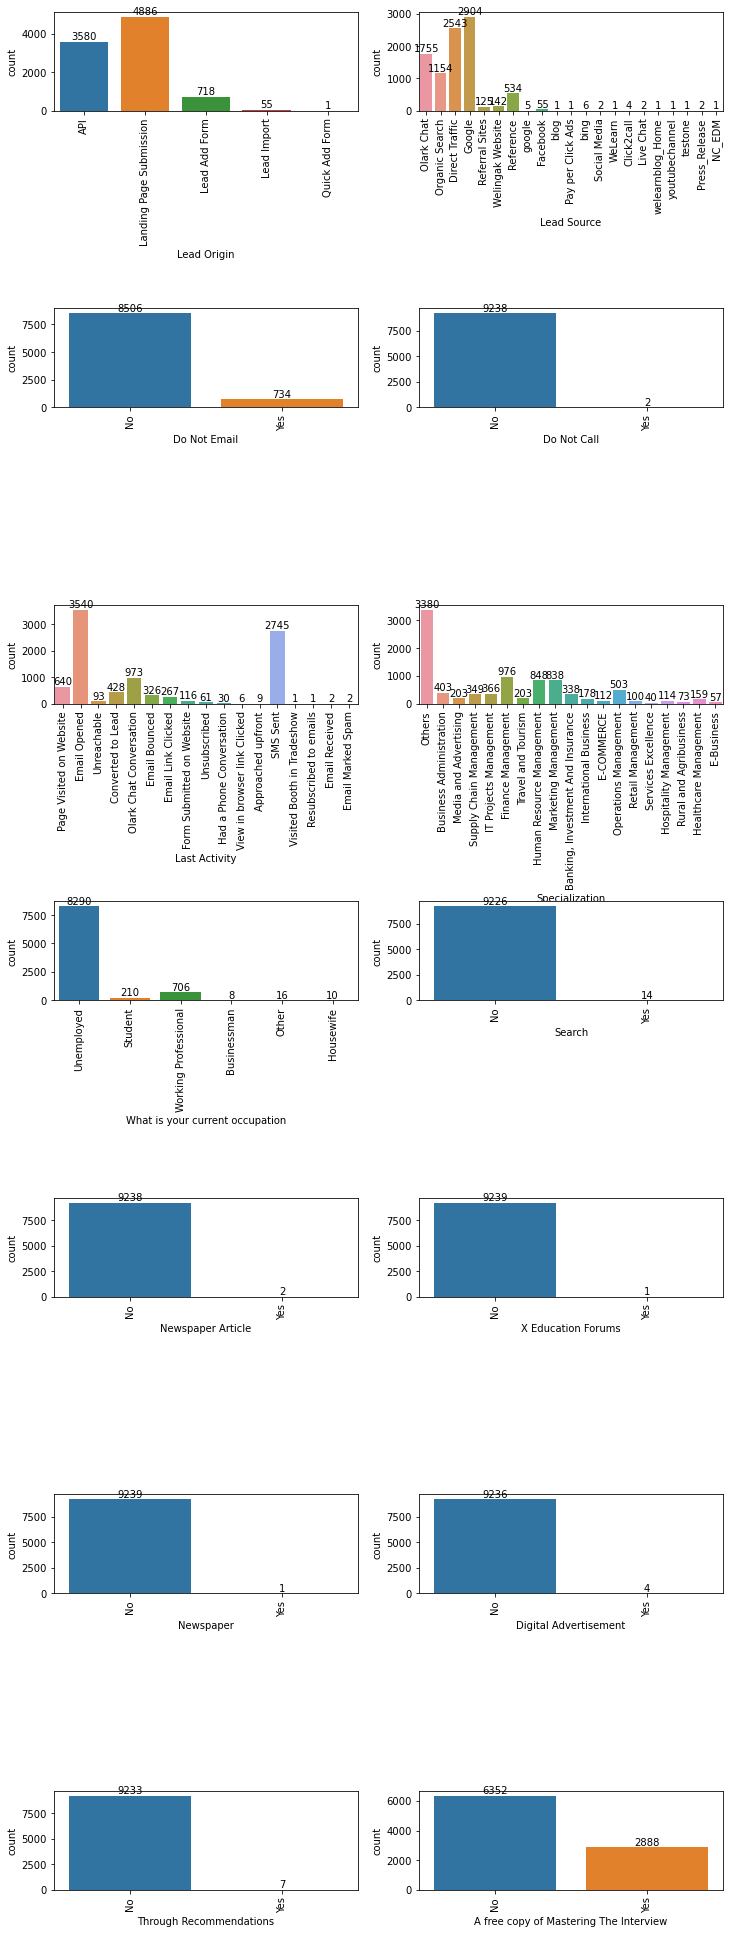

In [32]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [33]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [34]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


### 3.5 Outlier Analysis

In [35]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

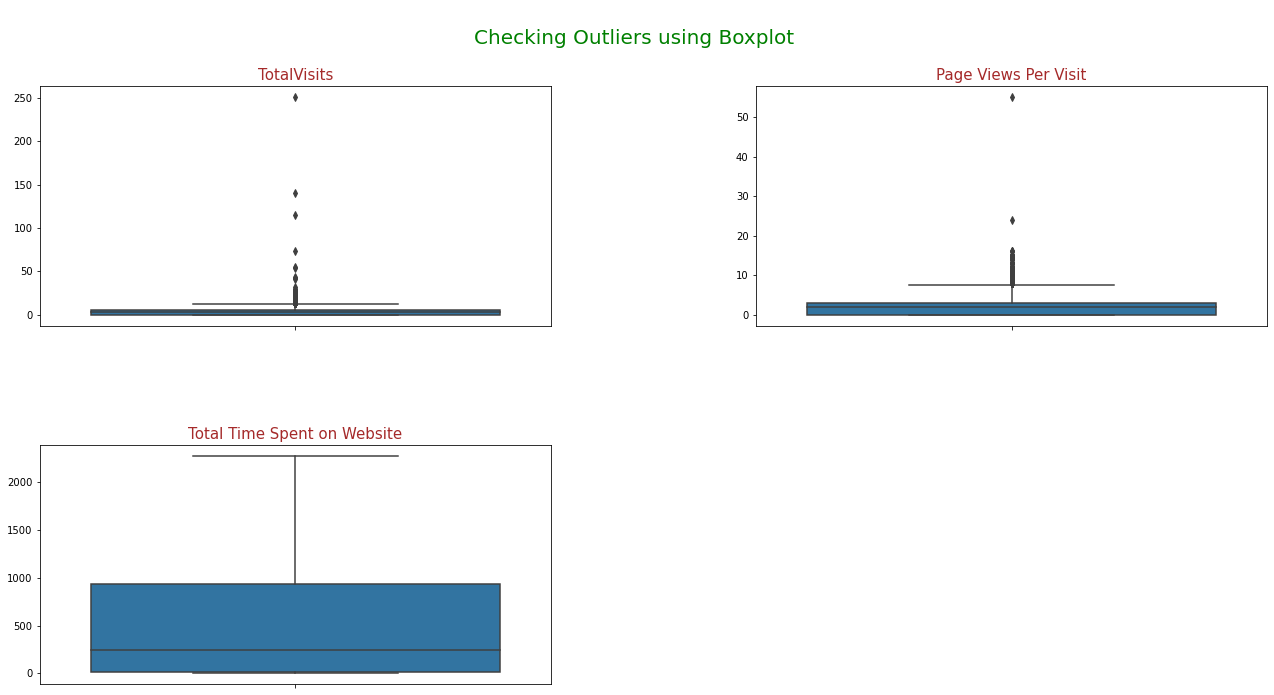

In [36]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

`"TotalVisits"`,`"Page Views Per Visit"`:Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

In [37]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [38]:
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [39]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]
Outlier_treatment(df_leads,capping_cols)

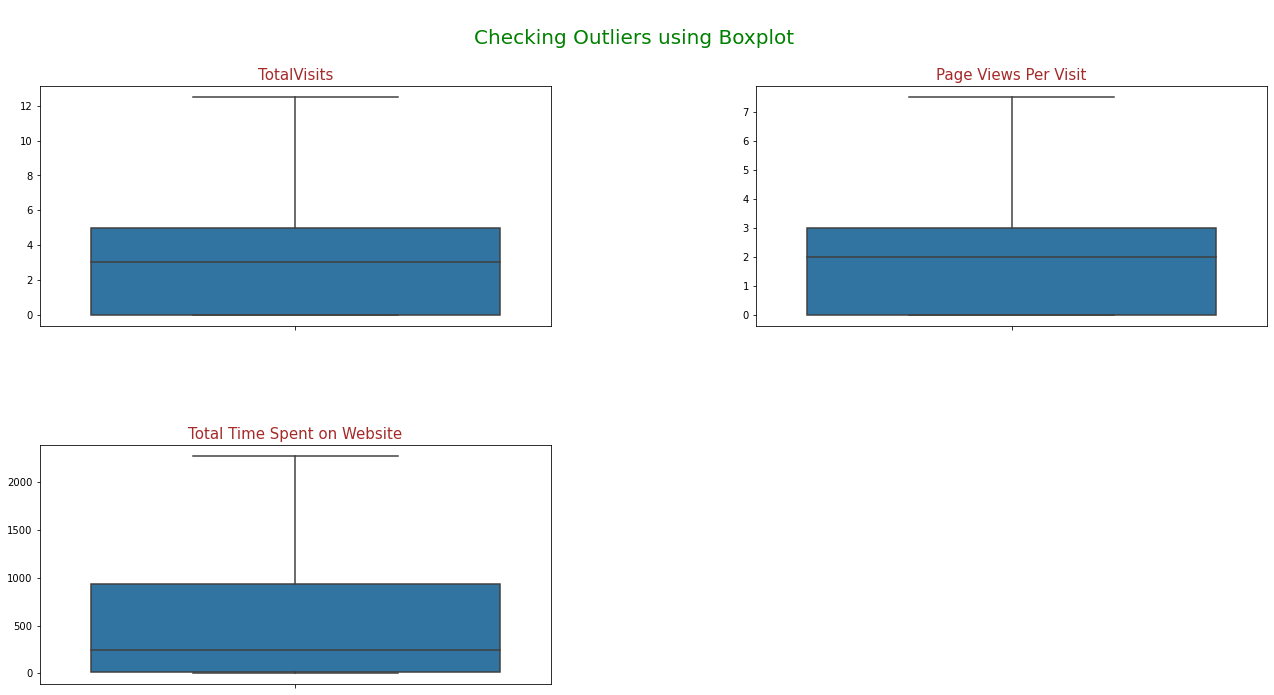

In [40]:
# Checking Boxplot after Outlier 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

In [41]:
# after outlier treatment detailed percentile values
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,12.500000,2272.000000,7.500000


###  Fixing Invalid values and Standardising Data in columns

In [42]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [43]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("% of valuecounts for :",i,"\n")
        print(perc,"\n")
        print("--"*25,"\n")


% of valuecounts for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

-------------------------------------------------- 

% of valuecounts for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
N

####  Grouping Low frequency values



In [44]:
# "Google" & "google" are same in "Lead Source",  we will standardise the case
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [45]:
df_leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [46]:
# "Lead Score" and "Last Activity" columns have very few records. We will group these categories together under "Others". 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [47]:
df_leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [48]:
# Renaming column names to "Curr_occupation" from "What is your current occupation"  to "Freecopy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Freecopy'}, inplace=True)
df_leads.rename(columns={'What is your current occupation': 'Curr_occupation'}, inplace=True)


#### Mapping Binary categorical variables - Colums "Do not email" and "Freecopy"

In [49]:
# Mapping binary categorical variables 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
df_leads['Freecopy'] = df_leads['Freecopy'].apply(lambda x: 1 if x =='Yes' else 0)

#### Checking Data-types of variables

In [50]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Curr_occupation              9240 non-null   object 
 10  Freecopy                     9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


## <strong><span style="color:blue">4: EDA - Data Analysis </span></strong>

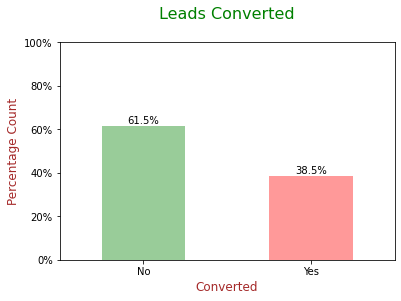

In [51]:
# TARGET VARIABLE " CONVERTED "
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


<strong><span style="color:RED">NOTE:</span></strong> 
- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

In [52]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### Univariate Analysis

In [53]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Curr_occupation,Freecopy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


#### Univariate Analysis for Categorical Variables

In [54]:
#List of categorical columns
cat_cols = ["Lead Origin","Curr_occupation","Do Not Email","Freecopy","Lead Source","Last Activity","Specialization"]

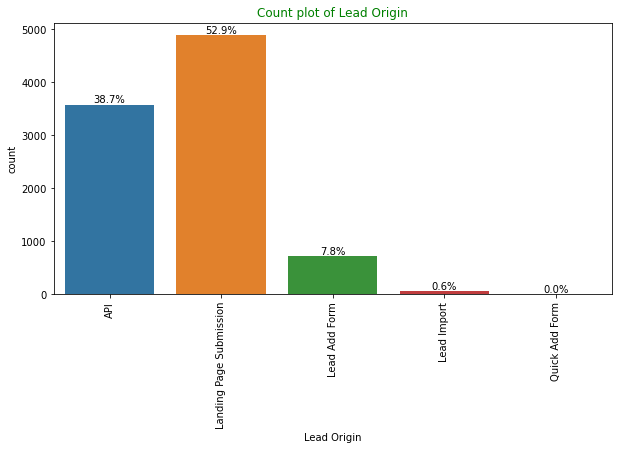

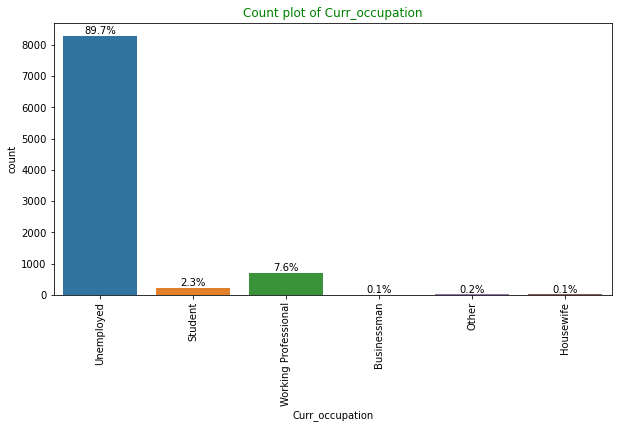

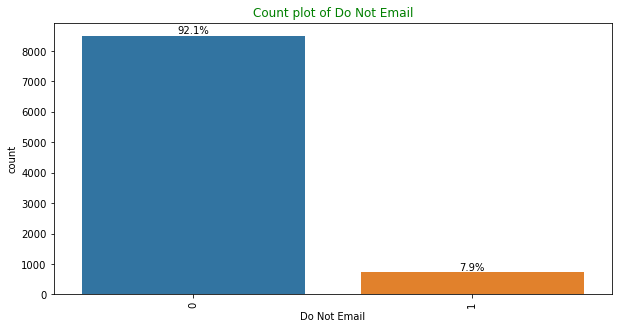

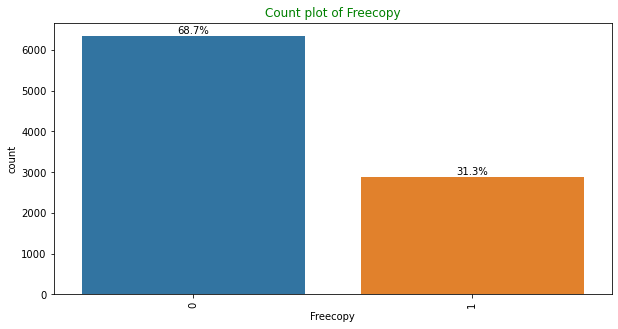

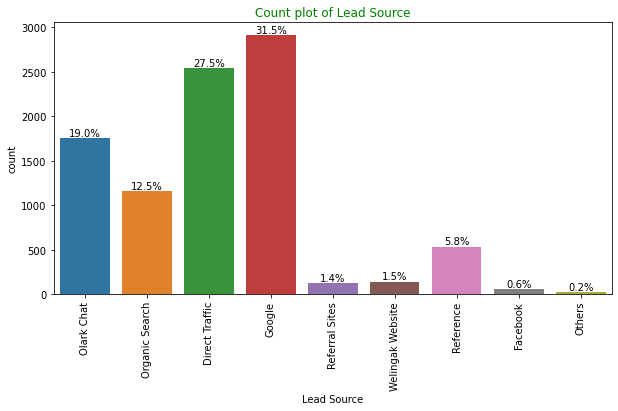

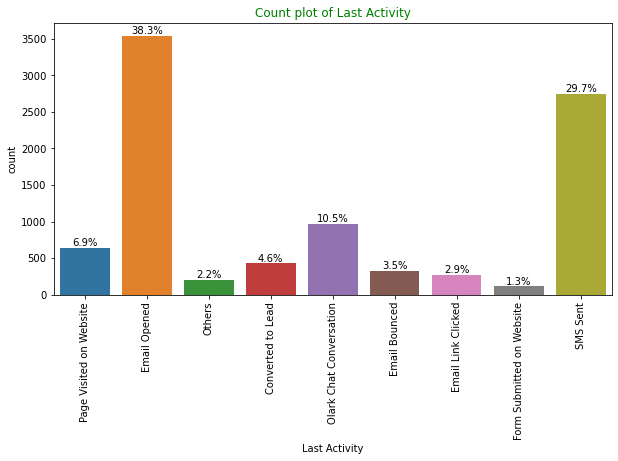

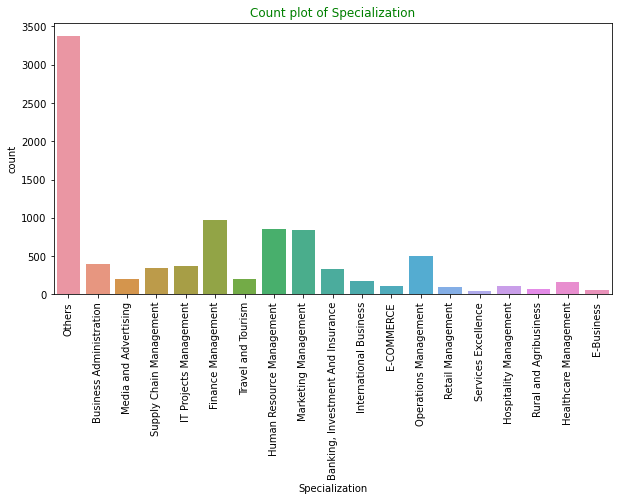

In [55]:
# Barplot for columns from cat_cols 
for i in cat_cols[:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

<strong><span style="color:RED">NOTE:</span></strong> 

- In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

**Observations from variables which are present in majority** 

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 

- **Current_occupation:** 90% of the customers as Unemployed

- **Do Not Email:** 92% of the people opted that they dont want to be emailed about the course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities



### Bivariate Analysis


#### Bivariate Analysis for Categorical Variables

In [56]:
def Bivar_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


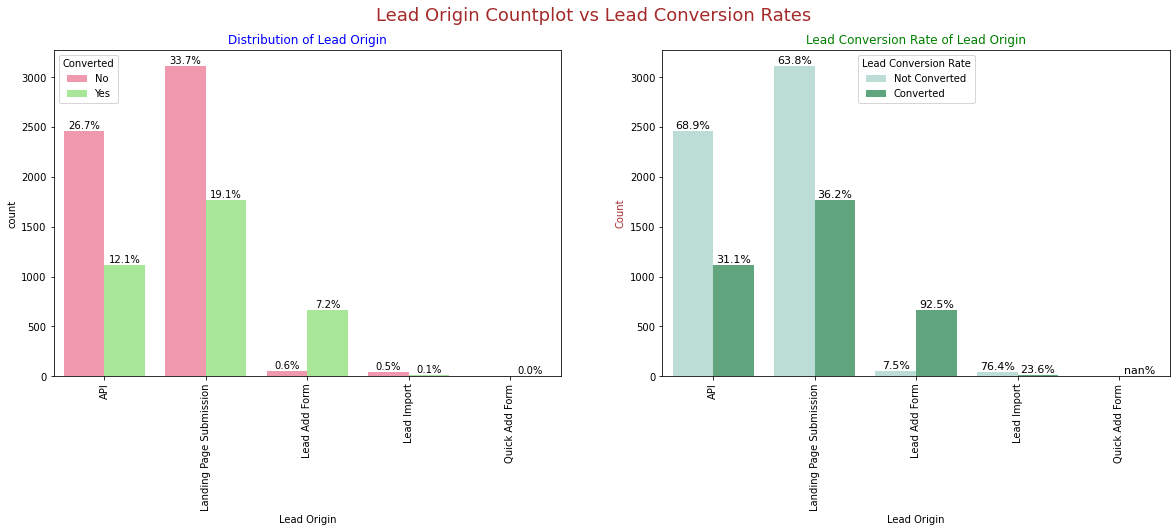

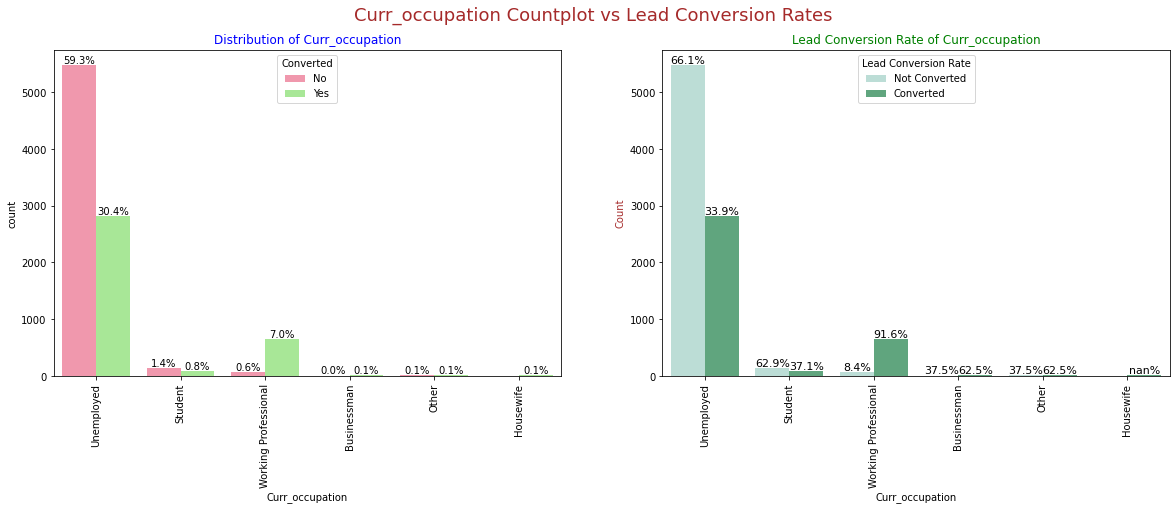

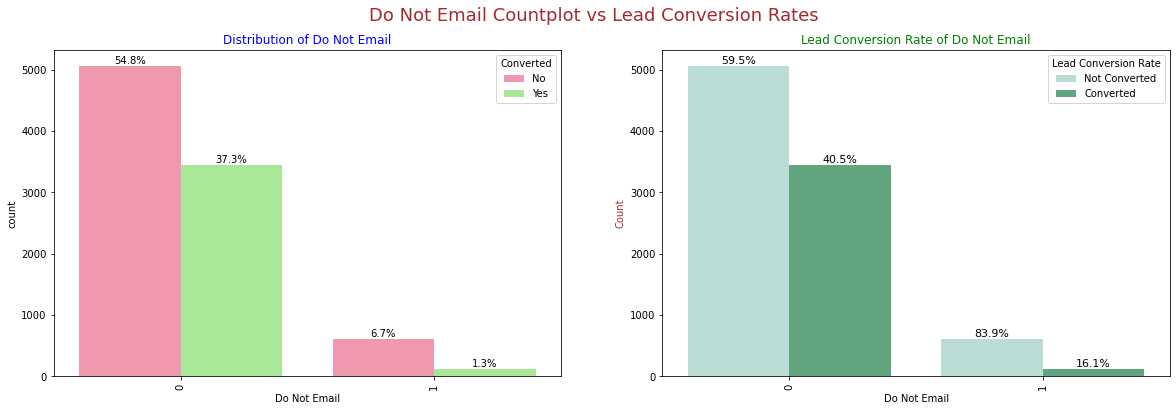

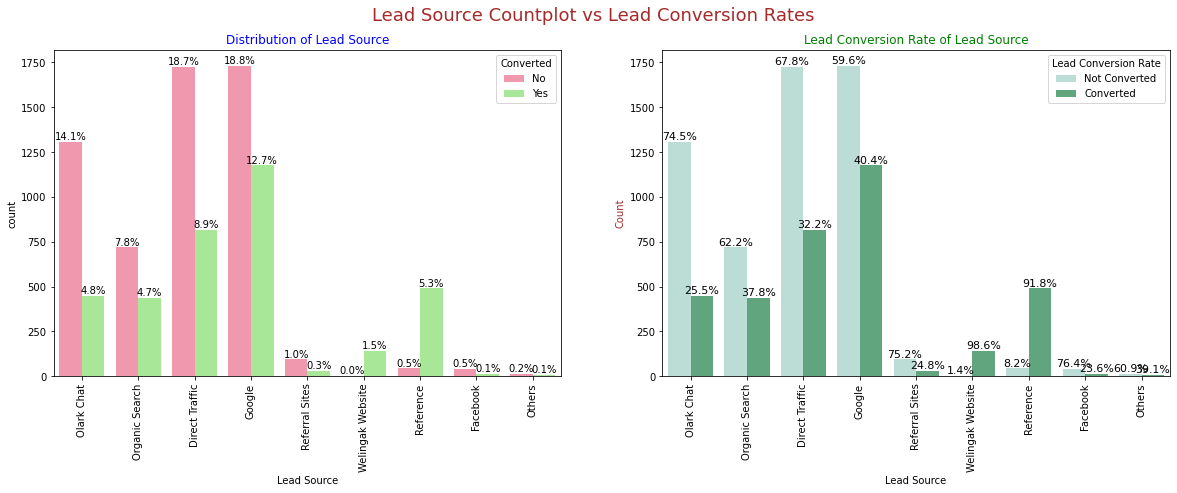

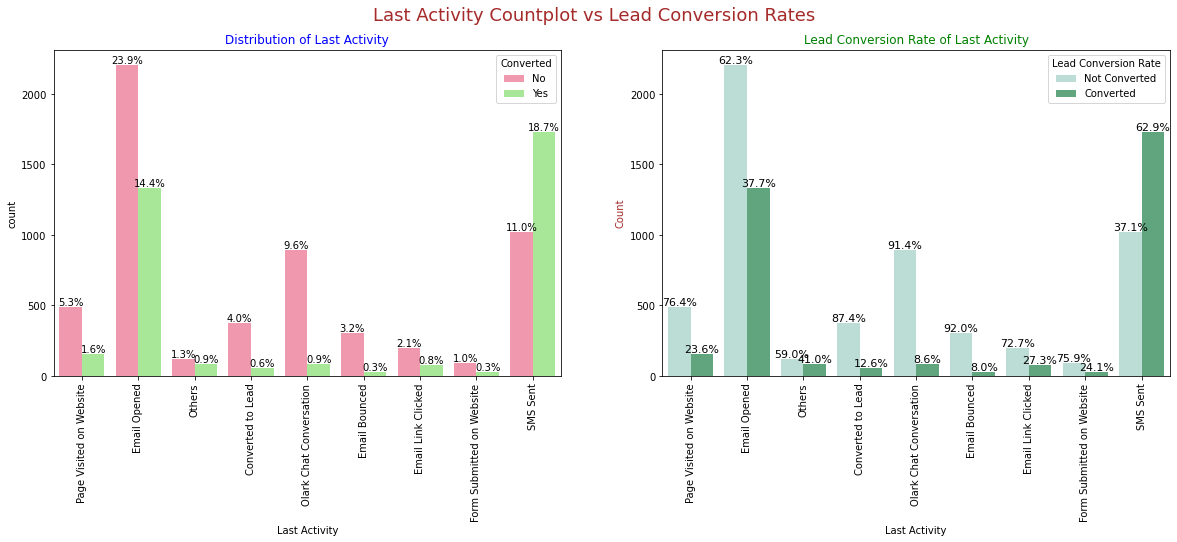

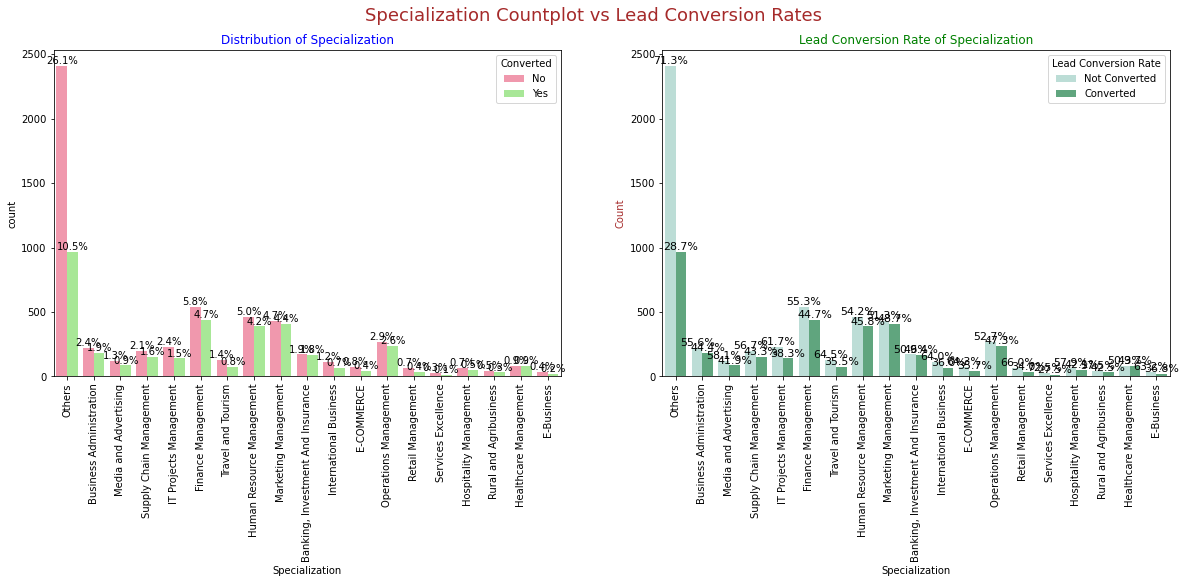

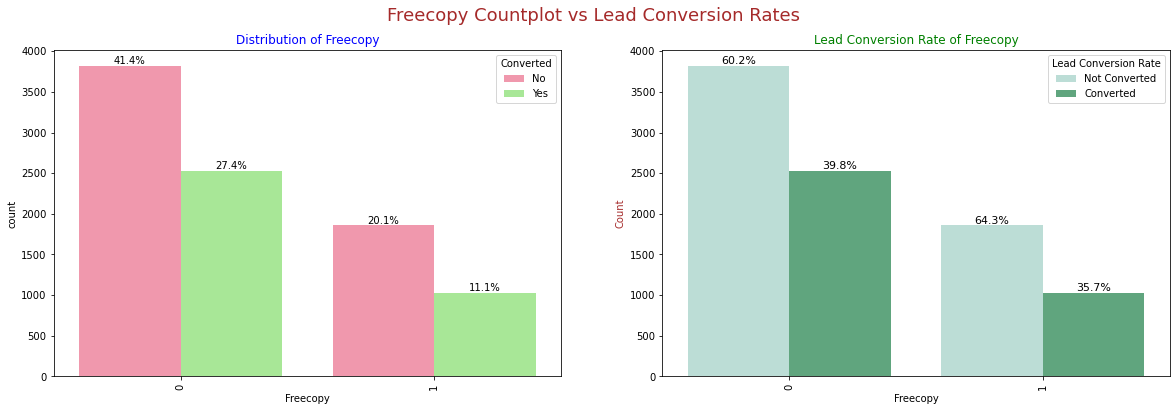

In [57]:
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Curr_occupation","Do Not Email","Lead Source","Last Activity","Specialization","Freecopy"]

for i in cat_cols:
    Bivar_cat(df_leads,variable_name=i)
    

<strong><span style="color:Red">Observations:</span></strong> 

- <strong><span style="color:Green">Lead Origin:</span></strong> 52% of all leads originated from _"Landing Page Submission"_ with a **lead conversion rate (LCR) of 36%**.The _"API"_ identified approximately 39% of customers with a **lead conversion rate (LCR) of 31%**.

- <strong><span style="color:Green">Current_occupation:</span></strong> 90% of the customers are _Unemployed_ with **lead conversion rate (LCR) of 34%**. While _Working Professional_ contribute only 7.6% of total customers with almost **92% lead conversion rate (LCR)**.

- <strong><span style="color:Green">Do Not Email:</span></strong> 92% of the people has opted that they dont want to be emailed about the course. 

- <strong><span style="color:Green">Lead Source:</span></strong> _Google_ has **LCR of 40%** out of 31% customers , _Direct Traffic_ contributes **32% LCR** with 27% customers, Organic Search_ also gives **37.8% of LCR** ,_Reference_ has **LCR of 91%**. 

- <strong><span style="color:Green">Last Activity:</span></strong> _'SMS Sent'_ has **high LCR of 63%** , _'Email Opened'_ activity has 37% LCR.


#### Bivariate Analysis for Numerical Variables

<Figure size 1152x288 with 0 Axes>

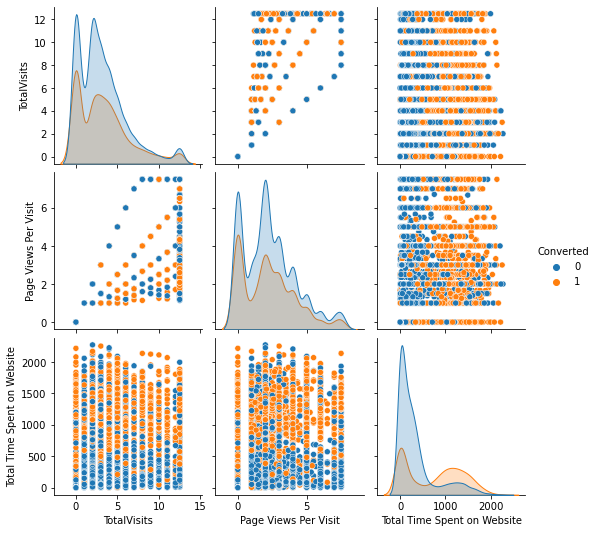

In [58]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [59]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

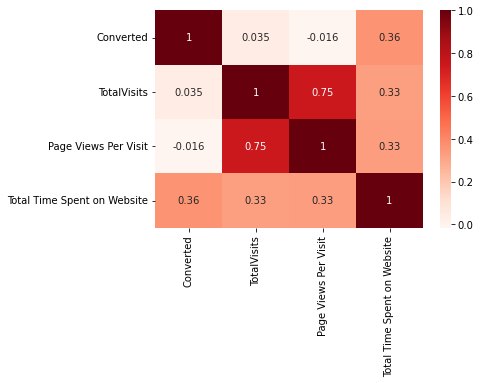

In [60]:
# Heatmap - correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Reds",annot=True)
plt.show()

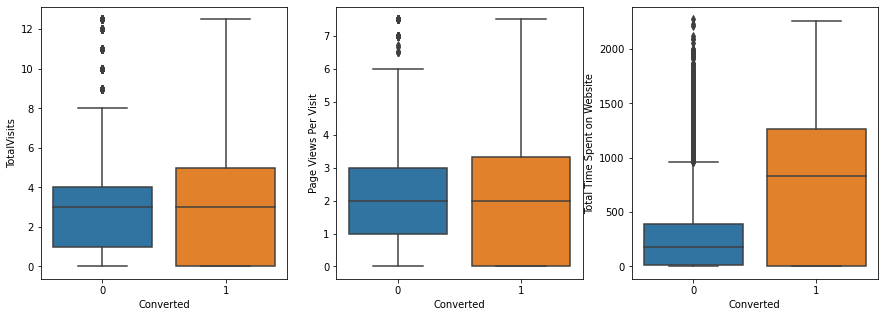

In [61]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

<strong><span style="color:Red">Note:</span></strong> 
- Leads who spends more time on Website are successfully converted than those who spends less.

## <strong><span style="color:brown">5: Data Preparation</span></strong>

###  Dummy Variables
- For categorical variables with multiple levels, create dummy features

In [62]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Curr_occupation,Freecopy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [63]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyvar = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Curr_occupation"]], drop_first=True)

df_leads = pd.concat([df_leads, dummyvar], axis=1)

In [64]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Curr_occupation,Freecopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Curr_occupation_Housewife,Curr_occupation_Other,Curr_occupation_Student,Curr_occupation_Unemployed,Curr_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [65]:
# dummies created for the variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Curr_occupation"],1)

In [66]:
df_leads.shape

(9240, 49)

In [67]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Freecopy                                  9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## <strong><span style="color:brown">6: Test-Train Split </span></strong>

In [68]:
# Putting predictor variables to X and Putting Target variables to y
X = df_leads.drop('Converted', axis=1)
y = df_leads["Converted"]


In [69]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [71]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## <strong><span style="color:brown">7:  Scaling </span></strong>

In [72]:
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [73]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Freecopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Curr_occupation_Housewife,Curr_occupation_Other,Curr_occupation_Student,Curr_occupation_Unemployed,Curr_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [74]:
# Checking the Lead Conversion Rate (LCR) - Target variable is "Converted" 

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

###  Correlations


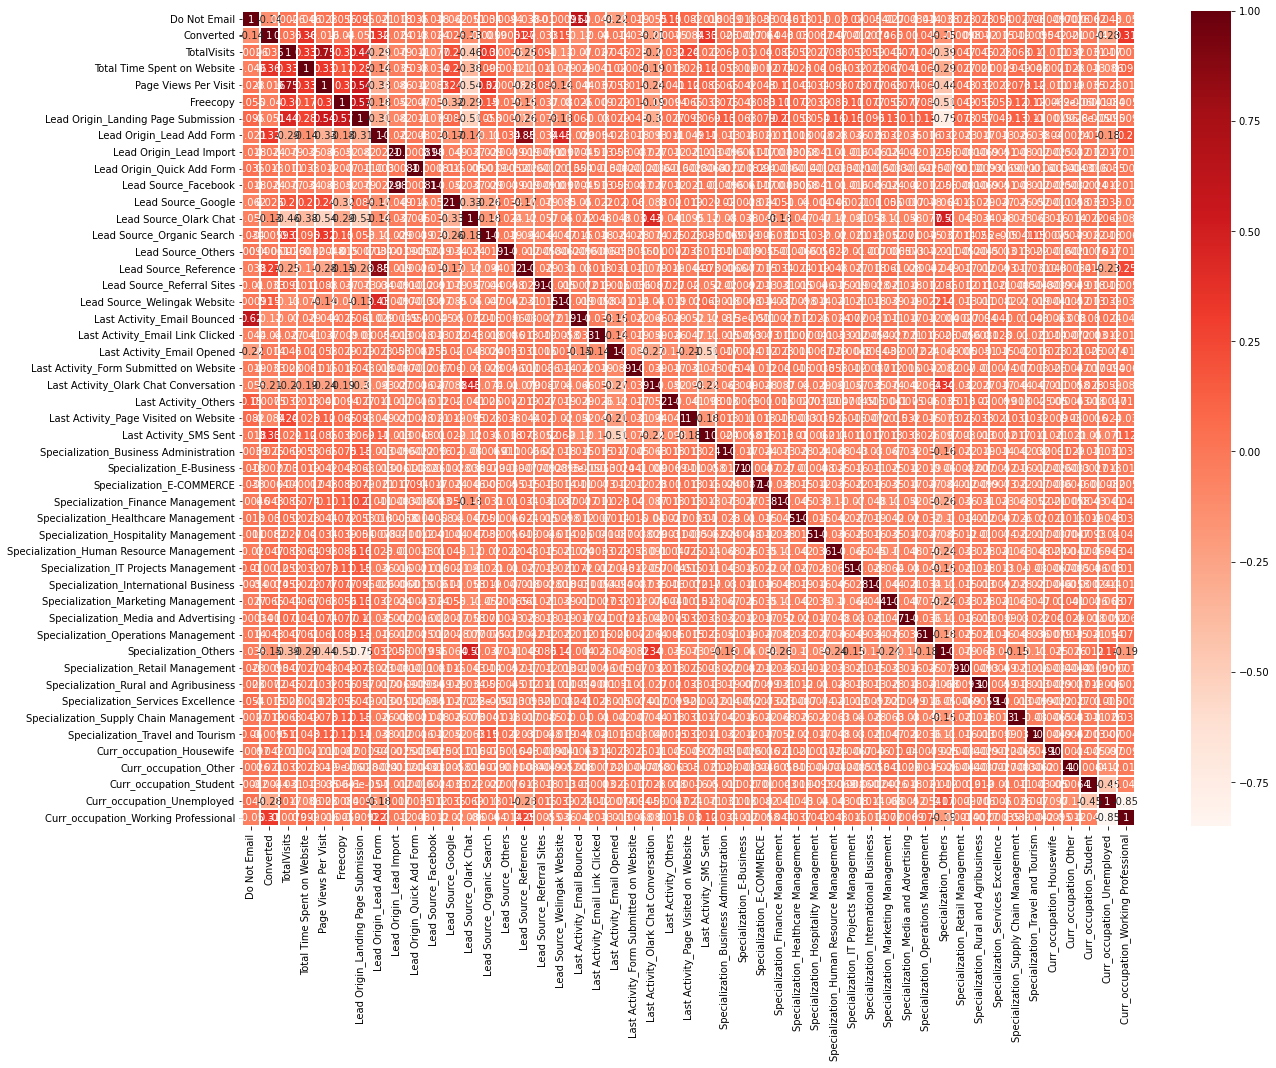

In [75]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.02,cmap="Reds",annot=True)
plt.show()

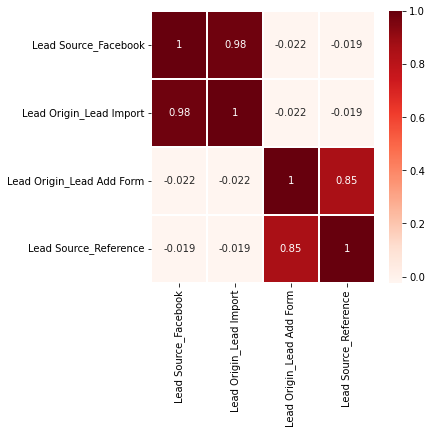

In [76]:
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()

<strong><span style="color:Red">Note:</span></strong> These above variables  are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them.

In [77]:
#lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## <strong><span style="color:Blue">Step 8: MODELING </span></strong>


###  Feature Selection Using  Recursive Feature Elimination - RFE

In [78]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [79]:
#checking the RFE output
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Freecopy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 1

In [80]:
# Checking the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Curr_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [81]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Curr_occupation_Housewife', 'Curr_occupation_Working Professional'],
      dtype='object')

In [82]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Freecopy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       

In [83]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [84]:
# Building model using statsmodels, for the detailed statistics


rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                    -1.033284
Total Time Spent on Website               1.050544
Lead Origin_Landing Page Submission      -1.272090
Lead Source_Facebook                     -0.696059
Lead Source_Olark Chat                    0.900083
Lead Source_Others                        0.980708
Lead Source_Reference                     2.897685
Lead Source_Welingak Website              5.380227
Last Activity_Email Opened                0.950623
Last Activity_Olark Chat Conversation    -0.553411
Last Activity_Others                      1.258012
Last Activity_SMS Sent                    2.068763
Specialization_Hospitality Management    -1.072037
Specialization_Others                    -1.193681
Curr_occupation_Housewife                23.022209
Curr_occupation_Working Professional      2.685466
dtype: float64

In [85]:
# summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sun, 19 Mar 2023   Deviance:                       5465.5
Time:                        19:44:04   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:RED">NOTE : </span></strong> "Current_occupation_Housewife" column can be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05.

### Model 2

In [86]:

rfe_col=rfe_col.drop("Curr_occupation_Housewife")

In [87]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                   -1.025075
Total Time Spent on Website              1.049364
Lead Origin_Landing Page Submission     -1.267369
Lead Source_Facebook                    -0.696913
Lead Source_Olark Chat                   0.899051
Lead Source_Others                       0.973897
Lead Source_Reference                    2.917123
Lead Source_Welingak Website             5.379144
Last Activity_Email Opened               0.949036
Last Activity_Olark Chat Conversation   -0.558345
Last Activity_Others                     1.248172
Last Activity_SMS Sent                   2.058828
Specialization_Hospitality Management   -1.079528
Specialization_Others                   -1.197801
Curr_occupation_Working Professional     2.677350
dtype: float64

In [88]:
#summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sun, 19 Mar 2023   Deviance:                       5480.7
Time:                        19:44:04   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Red">NOTE:</span></strong> "Lead Source_Facebook" column can be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 .

### Model 3

In [89]:
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [90]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                   -1.040542
Total Time Spent on Website              1.051824
Lead Origin_Landing Page Submission     -1.249311
Lead Source_Olark Chat                   0.916940
Lead Source_Others                       0.981395
Lead Source_Reference                    2.937179
Lead Source_Welingak Website             5.396676
Last Activity_Email Opened               0.943420
Last Activity_Olark Chat Conversation   -0.558250
Last Activity_Others                     1.248700
Last Activity_SMS Sent                   2.055550
Specialization_Hospitality Management   -1.090368
Specialization_Others                   -1.194330
Curr_occupation_Working Professional     2.675678
dtype: float64

In [91]:
#summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sun, 19 Mar 2023   Deviance:                       5482.6
Time:                        19:44:04   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Red">NOTE:</span></strong> "Lead Source_Others" column can be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 .

### Model 4

In [92]:
rfe_col=rfe_col.drop("Lead Source_Others")

In [93]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                   -1.023594
Total Time Spent on Website              1.049789
Lead Origin_Landing Page Submission     -1.258954
Lead Source_Olark Chat                   0.907184
Lead Source_Reference                    2.925326
Lead Source_Welingak Website             5.388662
Last Activity_Email Opened               0.942099
Last Activity_Olark Chat Conversation   -0.555605
Last Activity_Others                     1.253061
Last Activity_SMS Sent                   2.051879
Specialization_Hospitality Management   -1.094445
Specialization_Others                   -1.203333
Curr_occupation_Working Professional     2.669665
dtype: float64

In [94]:
#Summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Sun, 19 Mar 2023   Deviance:                       5486.1
Time:                        19:44:05   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:red">NOTE:</span></strong>  Model 4 is stable and has significant p-values 


In [95]:
# checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Curr_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


<strong><span style="color:Red">NOTE:</span></strong> All variables have good VIF values less than 5.
- We can consider Model 4 for Model Evaluation.

## <strong><span style="color:blue">9: Model Evaluation </span></strong> 

In [96]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)          

y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [97]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [98]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


In [99]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


###  Confusion Matrix

In [100]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


In [101]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


###  Sensitivity and Specificity


In [102]:
# true positive 
TP = confusion[1,1] 
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [103]:
# sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [104]:
# specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.896551724137931


In [105]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.10344827586206896


In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.7964601769911505


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8092016238159675


### ROC Curve

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

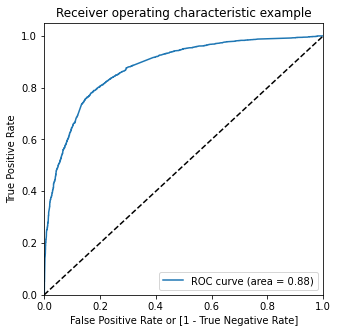

In [110]:
# ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Red">NOTE:</span></strong> Area under ROC curve is 0.88  which indicates a good predictive model

In [111]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [112]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


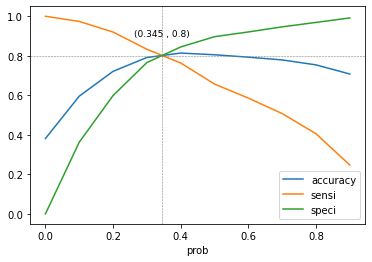

In [113]:
#  plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE:</span></strong> 0.345 seems to be our `Optimal cutoff point` for probability threshold .


In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### confusion matrix for Train

In [115]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))


0.8045763760049475


In [116]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [117]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


************************************************** 



In [118]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

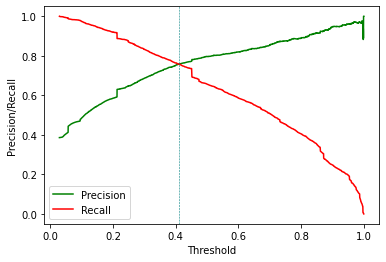

In [119]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Red">NOTE:</span></strong> Here our probability threshold is 0.41 aprrox from above curve.

In [120]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [121]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,1
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,1
4,0,0.212973,3934,0,0


In [122]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")





Confusion Matrix
[[3406  596]
 [ 596 1870]] 



True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positve                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489




<strong><span style="color:red">NOTE:</span></strong>- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.

### <strong><span style="color:purple"> Adding `Lead Score` Feature to Training dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [123]:
# Adding Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.474082,1871,1,47
1,0,0.073252,6795,0,7
2,0,0.249087,3516,0,25
3,0,0.768973,8105,1,77
4,0,0.212973,3934,0,21


## <strong><span style="color:Blue">10: Making Predictions on test set </span></strong> 

###  Scaling Test dataset

In [124]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Freecopy                                  2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [125]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Curr_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


###  Prediction on Test Dataset using final model 

In [126]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [127]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [128]:
# top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [129]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [130]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [131]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [132]:
# Renaming and Rearranging the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [133]:
# taking sensitivity-specificity method at 0.34 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


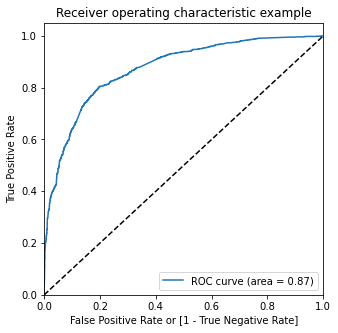

In [134]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

###  Test set Model Evaluation


In [135]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")




Confusion Matrix
[[1345  332]
 [ 216  879]] 



True Negative                    :  1345
True Positive                    :  879
False Negative                   :  216
False Positve                    :  332
Model Accuracy                   :  0.8023
Model Sensitivity                :  0.8027
Model Specificity                :  0.802
Model Precision                  :  0.7258
Model Recall                     :  0.8027
Model True Positive Rate (TPR)   :  0.8027
Model False Positive Rate (FPR)  :  0.198




<strong><span style="color:Red">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently .
- `For Test set`
    - Accuracy : 80.23%
    - Sensitivity : 80.27%
    - Specificity : 80.20%

In [136]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website             5.388662
Lead Source_Reference                    2.925326
Curr_occupation_Working Professional     2.669665
Last Activity_SMS Sent                   2.051879
Last Activity_Others                     1.253061
Total Time Spent on Website              1.049789
Last Activity_Email Opened               0.942099
Lead Source_Olark Chat                   0.907184
Last Activity_Olark Chat Conversation   -0.555605
const                                   -1.023594
Specialization_Hospitality Management   -1.094445
Specialization_Others                   -1.203333
Lead Origin_Landing Page Submission     -1.258954
dtype: float64

<strong><span style="color:Red">NOTE:</span></strong> A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads for coversion of leads.

In [137]:
# Adding Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


<strong><span style="color:Red">Lead Score: </span></strong> The customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

# <strong><span style="color:Red">Conclusion </span></strong> 

<strong><span style="color:Blue">NOTE:</span></strong> The model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 80.27% in the test set, using a cut-off value of 0.34.
- The model also achieved an accuracy of 80.23%, which is in line with the study's objectives.
<hr/>



## Model parameters
- The final Logistic Regression Model has 13 features

### <strong><span style="color:purple">Top 3 features that contributing positively to predicting hot leads in the model are:</span></strong> 
- <strong><span style="color:Blue">Lead Source_Welingak Website</span></strong>

- <strong><span style="color:Blue">Lead Source_Reference</span></strong> 

- <strong><span style="color:Blue">Current_occupation_Working Professional</span></strong> 

<strong><span style="color:Blue">NOTE: </span></strong> The Optimal cutoff probability point is 0.34.Converted probability greater than 0.34 will be predicted as Converted lead (Hot lead).
<hr/>

# <strong><span style="color:Red">OBSERVATIONS </span></strong> 

### <strong><span style="color:BLUE">To increase LCR Lead Conversion Rates: </span></strong>  

- Strategies to be developed toattract high-quality leads from top-performing lead sources.
- Optimize communication channels based on lead engagement impact.
- More budget can be spent on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing references that convert to leads.
- Working professionals to be targeted as they have high conversion rate and will have better financial situation to pay fees. 


### <strong><span style="color:blue">To identify areas of improvement: </span></strong>  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process .



